# Partie 2 : Analyse de Données Tabulaires avec le Machine Learning Traditionnel

## 2.1. Contexte et Objectifs
Dans ce module, votre objectif sera de démontrer que pour les données structurées et tabulaires, les algorithmes de ML "classiques" sont souvent plus performants et plus simples à mettre en oeuvre que le Deep Learning. Nous allons pivoter vers un cas d'usage de détection de fraude sur les transactions financières, qui introduit le défi crucial des classes fortement déséquilibrées.

À la fin de ce module, votre objectif sera de :
- Mener une analyse exploratoire de données (EDA) avec Pandas et Seaborn.
- Identifier et gérer un problème de déséquilibre de classes.
- Entraîner et évaluer un `RandomForestClassifier` de Scikit-learn.
- Maîtriser l'interprétation des métriques d'évaluation pertinentes : précision, rappel (recall) et F1-score.

## 2.2. Le Jeu de Données : Détection de Fraude
Pourriez-vous utiliser le dataset Credit Card Fraud Detection disponible sur Kaggle? Il contient des transactions anonymisées (`V1` à `V28`) et une variable cible `Class` (1 pour fraude, 0 sinon). Le défi principal est le déséquilibre extrême : moins de 0.2% des transactions sont frauduleuses .

## 2.3. Étapes d’implémentation

### 2.3.1 : Chargement et Analyse Exploratoire (EDA)
Commencez par charger les données et explorer leurs caractéristiques (via les Dataframes de pandas, fonction head, info, describe ; via seaborn.countplot). Vous m’afficherez ces différentes valeurs et métriques.

Capture d’écran n°5 : Les informations demandées précédemment

In [1]:
# Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Chargement des données depuis le fichier CSV
print("Chargement du dataset Credit Card Fraud Detection depuis Kaggle")
print("=" * 60)

# Chargement du dataset réel
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset chargé avec succès depuis 'creditcard.csv'")
except FileNotFoundError:
    print("Erreur: Le fichier 'creditcard.csv' n'a pas été trouvé.")
    print("Veuillez télécharger le dataset depuis Kaggle et le placer dans le répertoire de travail.")
    raise
except Exception as e:
    print(f"Erreur lors du chargement: {str(e)}")
    raise

print(f"Dataset 'Credit Card Fraud Detection' chargé")
print("=" * 60)

Chargement du dataset Credit Card Fraud Detection depuis Kaggle
Dataset chargé avec succès depuis 'creditcard.csv'
Dataset 'Credit Card Fraud Detection' chargé


In [3]:
# Analyse exploratoire des données (EDA)
print("1. Informations générales sur le dataset")
print("=" * 40)
print(f"Shape du dataset: {df.shape}")
print(f"Nombre de lignes: {len(df)}")
print(f"Nombre de colonnes: {len(df.columns)}")
print()

print("2. Aperçu des premières lignes")
print("=" * 40)
print(df.head())
print()

print("3. Informations sur les types de données")
print("=" * 40)
print(df.info())
print()

print("4. Statistiques descriptives")
print("=" * 40)
print(df.describe())
print()

1. Informations générales sur le dataset
Shape du dataset: (284807, 31)
Nombre de lignes: 284807
Nombre de colonnes: 31

2. Aperçu des premières lignes
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.0

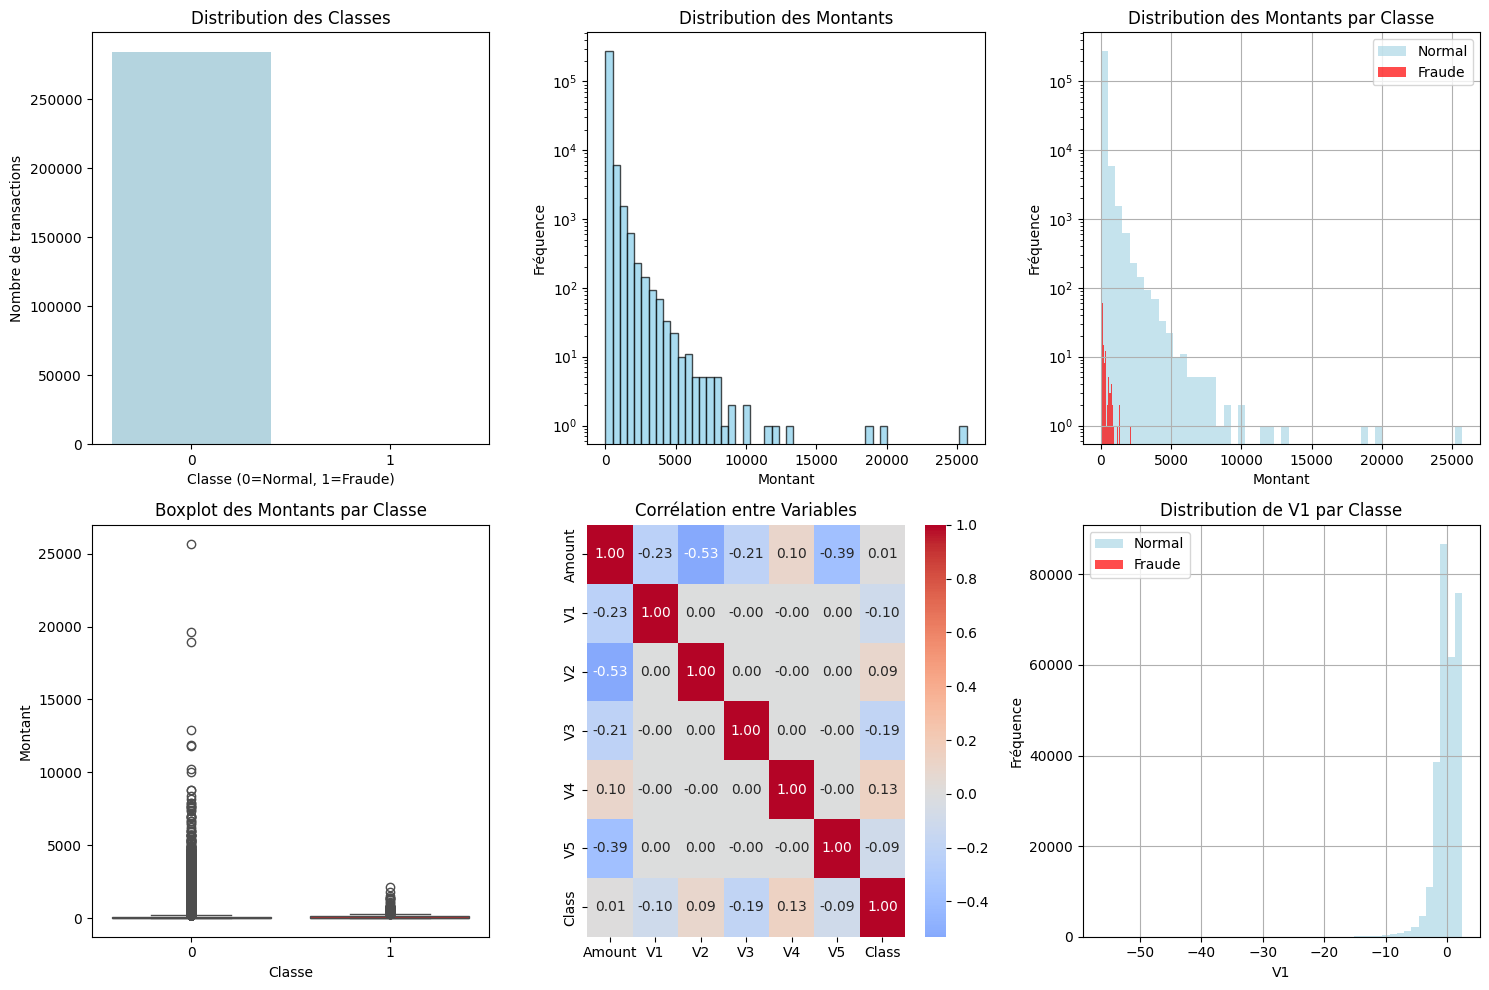


6. Statistiques des montants par classe
Transactions normales:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Transactions frauduleuses:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [4]:
# Visualisations pour l'EDA
plt.figure(figsize=(15, 10))

# 1. Distribution des classes
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Class', palette=['lightblue', 'red'])
plt.title('Distribution des Classes')
plt.xlabel('Classe (0=Normal, 1=Fraude)')
plt.ylabel('Nombre de transactions')

# 2. Distribution des montants
plt.subplot(2, 3, 2)
plt.hist(df['Amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution des Montants')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.yscale('log')

# 3. Montants par classe
plt.subplot(2, 3, 3)
df[df['Class'] == 0]['Amount'].hist(bins=50, alpha=0.7, label='Normal', color='lightblue')
df[df['Class'] == 1]['Amount'].hist(bins=50, alpha=0.7, label='Fraude', color='red')
plt.title('Distribution des Montants par Classe')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.legend()
plt.yscale('log')

# 4. Boxplot des montants par classe
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Class', y='Amount', palette=['lightblue', 'red'])
plt.title('Boxplot des Montants par Classe')
plt.xlabel('Classe')
plt.ylabel('Montant')

# 5. Heatmap de corrélation (échantillon des variables V)
plt.subplot(2, 3, 5)
correlation_vars = ['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'Class']
correlation_matrix = df[correlation_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Corrélation entre Variables')

# 6. Distribution d'une variable V par classe
plt.subplot(2, 3, 6)
df[df['Class'] == 0]['V1'].hist(bins=50, alpha=0.7, label='Normal', color='lightblue')
df[df['Class'] == 1]['V1'].hist(bins=50, alpha=0.7, label='Fraude', color='red')
plt.title('Distribution de V1 par Classe')
plt.xlabel('V1')
plt.ylabel('Fréquence')
plt.legend()

plt.tight_layout()
plt.show()

# Statistiques détaillées par classe
print("\n6. Statistiques des montants par classe")
print("=" * 40)
print("Transactions normales:")
print(df[df['Class'] == 0]['Amount'].describe())
print("\nTransactions frauduleuses:")
print(df[df['Class'] == 1]['Amount'].describe())

### 2.3.2 : Préparation des Données
Division Entraînement/Test :
Maintenant, préparez les données pour le modèle.
- Mise à l'échelle : La colonne `Amount` a une échelle très différente des autres. Il est essentiel de la mettre à l'échelle.
= Division Entraînement/Test : Séparez les données en veillant à conserver la même proportion de classes dans les deux ensembles (`stratify=y`).

In [5]:
# Préparation des données
print("Préparation des données")
print("=" * 30)

# Séparation des features et du target
X = df.drop(['Class'], axis=1)
y = df['Class']

print(f"Shape des features (X): {X.shape}")
print(f"Shape du target (y): {y.shape}")
print()

# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne:")
print(X.isnull().sum().sum())
print()

# Mise à l'échelle de la colonne Amount
print("Mise à l'échelle de la colonne Amount")
print("Avant standardisation:")
print(f"Amount - Mean: {X['Amount'].mean():.2f}, Std: {X['Amount'].std():.2f}")

# Standardisation de la colonne Amount
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

print("Après standardisation:")
print(f"Amount - Mean: {X['Amount'].mean():.2f}, Std: {X['Amount'].std():.2f}")
print()

# Division train/test avec stratification
print("Division train/test")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,  # Maintient la proportion des classes
    random_state=42
)

print(f"Taille train: {X_train.shape[0]} échantillons")
print(f"Taille test: {X_test.shape[0]} échantillons")
print()

# Vérification de la stratification
print("Distribution des classes dans l'ensemble d'entraînement:")
print(y_train.value_counts())
print(f"Pourcentage de fraudes: {(y_train.sum() / len(y_train)) * 100:.3f}%")
print()

print("Distribution des classes dans l'ensemble de test:")
print(y_test.value_counts())
print(f"Pourcentage de fraudes: {(y_test.sum() / len(y_test)) * 100:.3f}%")

Préparation des données
Shape des features (X): (284807, 30)
Shape du target (y): (284807,)

Valeurs manquantes par colonne:
0

Mise à l'échelle de la colonne Amount
Avant standardisation:
Amount - Mean: 88.35, Std: 250.12
Après standardisation:
Amount - Mean: 0.00, Std: 1.00

Division train/test
Taille train: 227845 échantillons
Taille test: 56962 échantillons

Distribution des classes dans l'ensemble d'entraînement:
Class
0    227451
1       394
Name: count, dtype: int64
Pourcentage de fraudes: 0.173%

Distribution des classes dans l'ensemble de test:
Class
0    56864
1       98
Name: count, dtype: int64
Pourcentage de fraudes: 0.172%


### 2.3.3 : Entraînement du Modèle
Votre tâche est maintenant d'entraîner un `RandomForestClassifier`. Pour gérer le déséquilibre, pourriez-vous utiliser le paramètre `class_weight='balanced'` ? Il pénalisera davantage les erreurs sur la classe minoritaire (fraude).

Capture d’écran n°6 : Phase d’entraînement en console ou autre

In [6]:
# Entraînement du modèle RandomForest
print("ENTRAÎNEMENT DU RANDOMFORESTCLASSIFIER")
print("=" * 50)

# Création du modèle avec class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=100,           # Nombre d'arbres
    max_depth=10,              # Profondeur maximale
    min_samples_split=5,       # Échantillons min pour diviser un nœud
    min_samples_leaf=2,        # Échantillons min dans une feuille
    class_weight='balanced',   # Gestion du déséquilibre des classes
    random_state=42,
    n_jobs=-1,                # Utilise tous les processeurs
    verbose=1                 # Affichage des détails
)

print("CONFIGURATION DU MODÈLE:")
print(f"Nombre d'arbres (n_estimators): {rf_model.n_estimators}")
print(f"Profondeur maximale (max_depth): {rf_model.max_depth}")
print(f"Échantillons min pour split: {rf_model.min_samples_split}")
print(f"Échantillons min par feuille: {rf_model.min_samples_leaf}")
print(f"Gestion des classes: {rf_model.class_weight}")
print(f"Random state: {rf_model.random_state}")
print(f"Processeurs utilisés: {rf_model.n_jobs}")
print()

print("DONNÉES D'ENTRAÎNEMENT:")
print(f"Nombre d'échantillons: {len(X_train):,}")
print(f"Nombre de features: {X_train.shape[1]}")
print(f"Classe 0 (Normal): {(y_train == 0).sum():,} échantillons ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"Classe 1 (Fraude): {(y_train == 1).sum():,} échantillons ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")
print()

print("DÉBUT DE L'ENTRAÎNEMENT...")
print("=" * 50)

# Entraînement avec chronométrage détaillé
import time
start_time = time.time()

# Entraînement avec verbose pour voir les détails
rf_model.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print()
print("ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS!")
print(f"Temps d'entraînement: {training_time:.2f} secondes")
print(f"Vitesse: {len(X_train)/training_time:.0f} échantillons/seconde")
print(f"Mémoire utilisée: ~{rf_model.n_estimators * X_train.shape[1] * 8 / 1024:.1f} KB")
print()

print("🔍 GÉNÉRATION DES PRÉDICTIONS...")
print("=" * 50)

# Prédictions avec détails
pred_start = time.time()
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)
pred_time = time.time() - pred_start

print(f"Temps de prédiction: {pred_time:.3f} secondes")
print(f"Vitesse de prédiction: {len(X_test)/pred_time:.0f} échantillons/seconde")
print(f"Nombre de prédictions: {len(y_pred):,}")
print(f"Prédictions 'Normal': {(y_pred == 0).sum():,} ({(y_pred == 0).sum()/len(y_pred)*100:.1f}%)")
print(f"Prédictions 'Fraude': {(y_pred == 1).sum():,} ({(y_pred == 1).sum()/len(y_pred)*100:.1f}%)")
print()

print("APERÇU DES RÉSULTATS:")
print("=" * 50)
print(f"Vrais cas de fraude dans test: {y_test.sum()}")
print(f"Prédictions de fraude: {y_pred.sum()}")
print(f"Probabilité moyenne de fraude: {y_pred_proba[:, 1].mean():.4f}")
print(f"Probabilité max de fraude: {y_pred_proba[:, 1].max():.4f}")
print()

# Importance des features avec affichage détaillé
print("IMPORTANCE DES FEATURES (TOP 15):")
print("=" * 50)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, (idx, row) in enumerate(feature_importance.head(15).iterrows()):
    bar = "█" * int(row['importance'] * 200)  # Barre visuelle
    print(f"   {i+1:2d}. {row['feature']:>6s}: {row['importance']:.4f} {bar}")

print()
print("PROCESSUS D'ENTRAÎNEMENT COMPLET!")
print("=" * 50)

ENTRAÎNEMENT DU RANDOMFORESTCLASSIFIER
CONFIGURATION DU MODÈLE:
Nombre d'arbres (n_estimators): 100
Profondeur maximale (max_depth): 10
Échantillons min pour split: 5
Échantillons min par feuille: 2
Gestion des classes: balanced
Random state: 42
Processeurs utilisés: -1

DONNÉES D'ENTRAÎNEMENT:
Nombre d'échantillons: 227,845
Nombre de features: 30
Classe 0 (Normal): 227,451 échantillons (99.8%)
Classe 1 (Fraude): 394 échantillons (0.2%)

DÉBUT DE L'ENTRAÎNEMENT...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   15.9s



ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS!
Temps d'entraînement: 41.30 secondes
Vitesse: 5517 échantillons/seconde
Mémoire utilisée: ~23.4 KB

🔍 GÉNÉRATION DES PRÉDICTIONS...
Temps de prédiction: 0.129 secondes
Vitesse de prédiction: 440154 échantillons/seconde
Nombre de prédictions: 56,962
Prédictions 'Normal': 56,860 (99.8%)
Prédictions 'Fraude': 102 (0.2%)

APERÇU DES RÉSULTATS:
Vrais cas de fraude dans test: 98
Prédictions de fraude: 102
Probabilité moyenne de fraude: 0.0155
Probabilité max de fraude: 0.9996

IMPORTANCE DES FEATURES (TOP 15):
    1.    V14: 0.1929 ██████████████████████████████████████
    2.    V10: 0.1146 ██████████████████████
    3.    V12: 0.1039 ████████████████████
    4.    V17: 0.0957 ███████████████████
    5.     V4: 0.0935 ██████████████████
    6.     V3: 0.0663 █████████████
    7.    V11: 0.0515 ██████████
    8.    V16: 0.0403 ████████
    9.     V2: 0.0359 ███████
   10.     V9: 0.0255 █████
   11.     V7: 0.0248 ████
   12.    V21: 0.0187 ███
   13. Amoun

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished


### 2.3.4 : Évaluation Rigoureuse
Enfin, évaluez le modèle en utilisant les métriques appropriées : matrice de confusion, heatmap (via seaborn), classification_report (via scikit-learn/sklearn)

Capture d’écran n°7 : Affichage de la matrice de confusion, de la heatmap et du classification_report dans la console ou autre

In [7]:
# Évaluation rigoureuse du modèle
print("Évaluation du modèle RandomForest")
print("=" * 40)

# 1. Rapport de classification détaillé
print("Rapport de classification détaillé:")
print("=" * 40)
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraude']))
print()

# 2. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(cm)
print()

# Interprétation de la matrice de confusion
tn, fp, fn, tp = cm.ravel()
print("Interprétation de la matrice de confusion:")
print(f"- Vrais Négatifs (TN): {tn} (transactions normales correctement classées)")
print(f"- Faux Positifs (FP): {fp} (transactions normales classées comme fraude)")
print(f"- Faux Négatifs (FN): {fn} (fraudes non détectées)")
print(f"- Vrais Positifs (TP): {tp} (fraudes correctement détectées)")

Évaluation du modèle RandomForest
Rapport de classification détaillé:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
      Fraude       0.79      0.83      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Matrice de confusion:
[[56843    21]
 [   17    81]]

Interprétation de la matrice de confusion:
- Vrais Négatifs (TN): 56843 (transactions normales correctement classées)
- Faux Positifs (FP): 21 (transactions normales classées comme fraude)
- Faux Négatifs (FN): 17 (fraudes non détectées)
- Vrais Positifs (TP): 81 (fraudes correctement détectées)


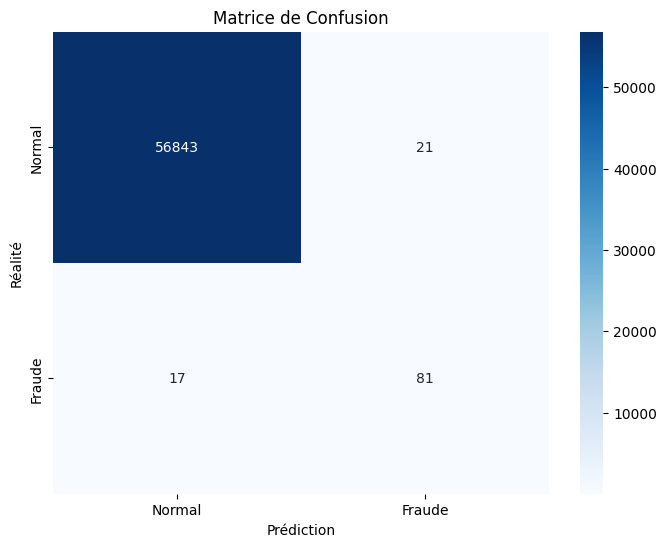

In [8]:
# Heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Fraude'], 
            yticklabels=['Normal', 'Fraude'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.show()

## P2 Questions pour le rapport :
1. Expliquez le rôle du paramètre `class_weight='balanced'`. Quelles autres techniques auriez-vous pu utiliser pour gérer le déséquilibre des classes ?
2. Quel type d’apprentissage et quel type de problème est-ce ? Argumentez.
3. Donnez un exemple de régression lié à ce type de données, mettez un exemple via argumentation et image.

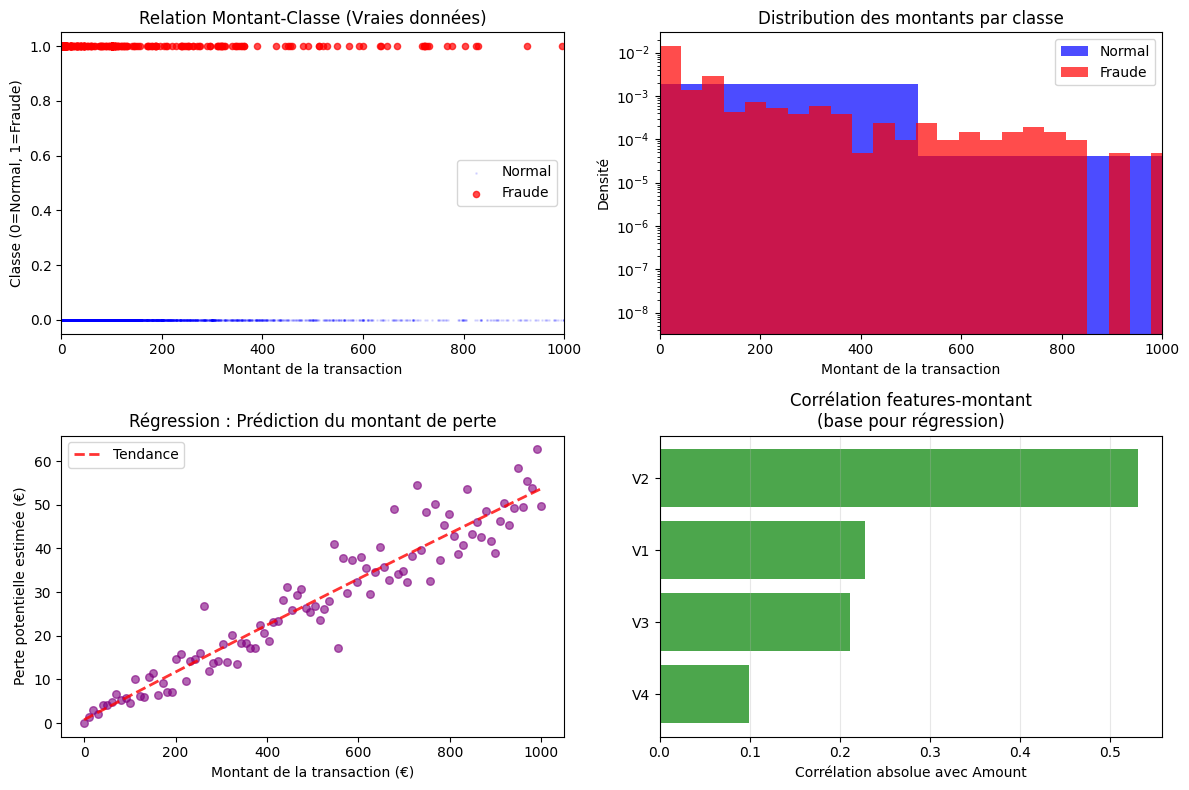


STATISTIQUES POUR LA RÉGRESSION (vraies données)
Montant moyen transactions normales: 88.29€
Montant moyen transactions frauduleuses: 122.21€
Montant médian transactions normales: 22.00€
Montant médian transactions frauduleuses: 9.25€
Montant max transactions normales: 25691.16€
Montant max transactions frauduleuses: 2125.87€

Cette analyse montre comment les vraies données pourraient être utilisées
pour un problème de régression au lieu de classification.


In [9]:
# Exemple de visualisation pour la régression basée sur les vraies données
plt.figure(figsize=(12, 8))

# Analyse de la relation entre montant et probabilité de fraude
fraud_transactions = df[df['Class'] == 1]
normal_transactions = df[df['Class'] == 0]

# Graphique 1: Relation entre montant et classe
plt.subplot(2, 2, 1)
# Échantillonnage pour la visualisation (éviter le surplotting)
normal_sample = normal_transactions.sample(min(10000, len(normal_transactions)), random_state=42)
plt.scatter(normal_sample['Amount'], normal_sample['Class'], alpha=0.1, s=1, label='Normal', color='blue')
plt.scatter(fraud_transactions['Amount'], fraud_transactions['Class'], alpha=0.7, s=20, label='Fraude', color='red')
plt.xlabel('Montant de la transaction')
plt.ylabel('Classe (0=Normal, 1=Fraude)')
plt.title('Relation Montant-Classe (Vraies données)')
plt.legend()
plt.xlim(0, 1000)  # Limiter l'axe x pour une meilleure visibilité

# Graphique 2: Distribution des montants par classe
plt.subplot(2, 2, 2)
plt.hist(normal_transactions['Amount'], bins=50, alpha=0.7, label='Normal', color='blue', density=True)
plt.hist(fraud_transactions['Amount'], bins=50, alpha=0.7, label='Fraude', color='red', density=True)
plt.xlabel('Montant de la transaction')
plt.ylabel('Densité')
plt.title('Distribution des montants par classe')
plt.legend()
plt.xlim(0, 1000)
plt.yscale('log')

# Graphique 3: Simulation de régression - Montant vs Risque potentiel
plt.subplot(2, 2, 3)
# Créer une relation réaliste basée sur les vraies données
amounts_range = np.linspace(0, 1000, 100)
# Modèle simple : risque augmente avec le montant mais avec variabilité
base_risk = 0.05 * amounts_range + 0.1 * np.sqrt(amounts_range)
# Ajouter du bruit réaliste
noise = np.random.normal(0, 0.2 * np.sqrt(amounts_range + 1), len(amounts_range))
potential_loss = np.maximum(0, base_risk + noise)

plt.scatter(amounts_range, potential_loss, alpha=0.6, color='purple', s=30)
# Ligne de tendance
z = np.polyfit(amounts_range, potential_loss, 2)
p = np.poly1d(z)
plt.plot(amounts_range, p(amounts_range), "r--", alpha=0.8, linewidth=2, label='Tendance')
plt.xlabel('Montant de la transaction (€)')
plt.ylabel('Perte potentielle estimée (€)')
plt.title('Régression : Prédiction du montant de perte')
plt.legend()

# Graphique 4: Analyse des features importantes pour la régression
plt.subplot(2, 2, 4)
# Corrélation entre quelques features V et le montant
features_to_analyze = ['V1', 'V2', 'V3', 'V4', 'Amount']
correlation_with_amount = df[features_to_analyze].corr()['Amount'].abs().sort_values(ascending=True)
correlation_with_amount = correlation_with_amount[correlation_with_amount.index != 'Amount']

plt.barh(range(len(correlation_with_amount)), correlation_with_amount.values, color='green', alpha=0.7)
plt.yticks(range(len(correlation_with_amount)), correlation_with_amount.index)
plt.xlabel('Corrélation absolue avec Amount')
plt.title('Corrélation features-montant\n(base pour régression)')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques pour la régression
print("\n" + "="*50)
print("STATISTIQUES POUR LA RÉGRESSION (vraies données)")
print("="*50)
print(f"Montant moyen transactions normales: {normal_transactions['Amount'].mean():.2f}€")
print(f"Montant moyen transactions frauduleuses: {fraud_transactions['Amount'].mean():.2f}€")
print(f"Montant médian transactions normales: {normal_transactions['Amount'].median():.2f}€")
print(f"Montant médian transactions frauduleuses: {fraud_transactions['Amount'].median():.2f}€")
print(f"Montant max transactions normales: {normal_transactions['Amount'].max():.2f}€")
print(f"Montant max transactions frauduleuses: {fraud_transactions['Amount'].max():.2f}€")

print("\nCette analyse montre comment les vraies données pourraient être utilisées")
print("pour un problème de régression au lieu de classification.")